<a href="https://colab.research.google.com/github/ivan-qh/practicas/blob/main/SudokuCConMoDEf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Programa Sudoku NxN<center>**

#**Datos Academicos**

- **Universidad:** Universidad Nacional de San Antonio Abad del Cusco
- **Facultad:** Facultad de ingenieria electrica, electronica, informatica y mecanica
- **Escuela Profesional:** Ingenieria Informatica y de Sistemas
#### Ingeniera:
- **Quintanilla Portugal Roxana Lisette**
#### Trabajo:
- Documentar y entender un programa paralelizable.
#### Colaboradores:
- **GABRIELA FARFAN ENRIQUEZ** [Gabi](https://github.com/gabrielafarfan1)
- **SEBASTIAN ISRAEL MACEDO GHEILER**  [Sebas](https://github.com/sebasmacedohotmailcom)
- **VICTOR URQUIZO CARBAJAL** [Victor](https://github.com/victorUrquizo)
- **HUAHUATICO SORIA RONALD** [Romehe](https://github.com/Romehe369)
- **NAOMI ISABEL MASIAS USCAMAYTA** [Naomi](https://github.com/naomi159)
- **IVAN ARTHUR QUISPE HUARHUA** [Ivan](https://github.com/ivan-qh)
- **MICHAEL ANTONNI MAMANI QUINTA** [Antoni](https://github.com/Michael-Antonni)
- **FRANK EDISON PUMAYALLI CUSICUNA** [Frank](https://github.com/frankpumacusi)

#Descripcion de Problema:
Supongamos que tenemos una cuadrícula de Sudoku y tenemos que resolver este famoso problema de laberinto de números, Sudoku. Sabemos que el Sudoku es una cuadrícula de números de N x N, y toda la cuadrícula también se divide en cuadros de sqrt(N) x sqrt(N). Hay algunas reglas para resolver el Sudoku. Tenemos que usar los dígitos del 1 al N para resolver este problema.

-No se puede repetir un dígito en una fila, una columna o en una casilla de sqr (N) x sqrt(N).

Usando el algoritmo de Bractraking paralelo intentaremos resolver el problema de Sudoku. Cuando alguna celda se llena con un dígito, comprueba si es válido o no. Cuando no es válido, busca otros números. Si se marcan todos los números del 1 al N y no se encuentra ningún dígito válido para colocar, retrocede a la opción anterior. Y finalmente se intentara con todas las opciones posibles. Caso que no se encuentre ninguna solucion el programa nos enviara un mensaje de que "No existe Solucion"

Nuestro programa realizara un soluciion del sudoku de nxn dimensiones.


Sudoku 4x4

https://drive.google.com/file/d/1o0zt4Ofuyp_InXM9wb1aWzJktfvRFZDb/view?usp=sharing

Sudoku 9x9

https://drive.google.com/file/d/1Bxb63DIOqoPCy-wkyBE0nD1o0kqtx3Nm/view?usp=sharing

Sudoku 16x16

https://drive.google.com/file/d/1xoSJadH5Q3YmkPP1xEEu6zoJJfjANaaw/view?usp=sharing

Sudoku 25x25

https://drive.google.com/file/d/1TpzPeXHgPwhMBjetrnu-vRYzd1AseZoL/view?usp=sharing

En la parte inferior se muestra una idea de un sudoku incompleto dicha imagen se obtuvo de la pagina
http://www.sudoku-download.net/index.php

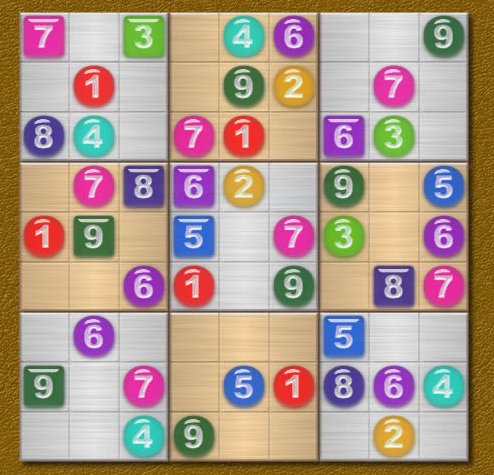

# **Esquema de Backtraking Paralelo con el sudoku**
Esquema no puramente paralelo, es un esquema utilizado en programación secuencial que se intenta paralelizar. Esto supone que la ganancia de tiempo no sea tan elevada como se pudiera esperar a priori.

Se intenta distribuir el espacio de búsqueda entre los distintos procesadores, de forma que cada uno busque la solución del problema en un subespacio de soluciones distinto. 

Así se exploran varias ramas del árbol de soluciones al mismo tiempo por distintos procesadores.  Aumentan las posibilidades de encontrar la solución del problema en menor tiempo.
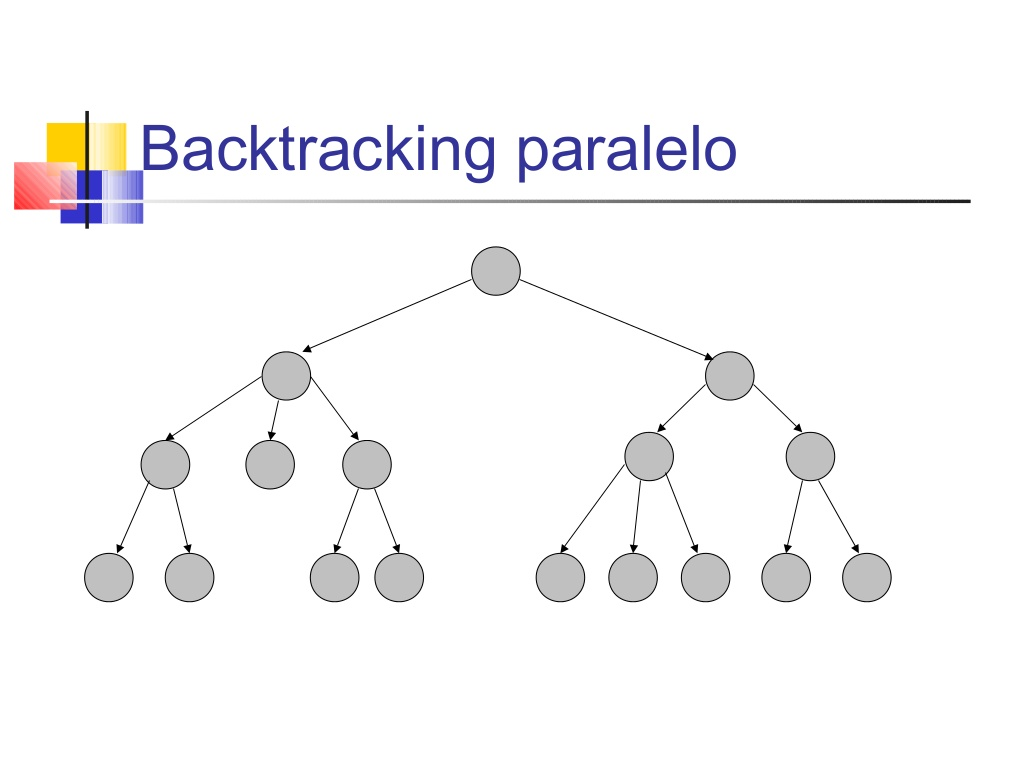

Y el esquema de division

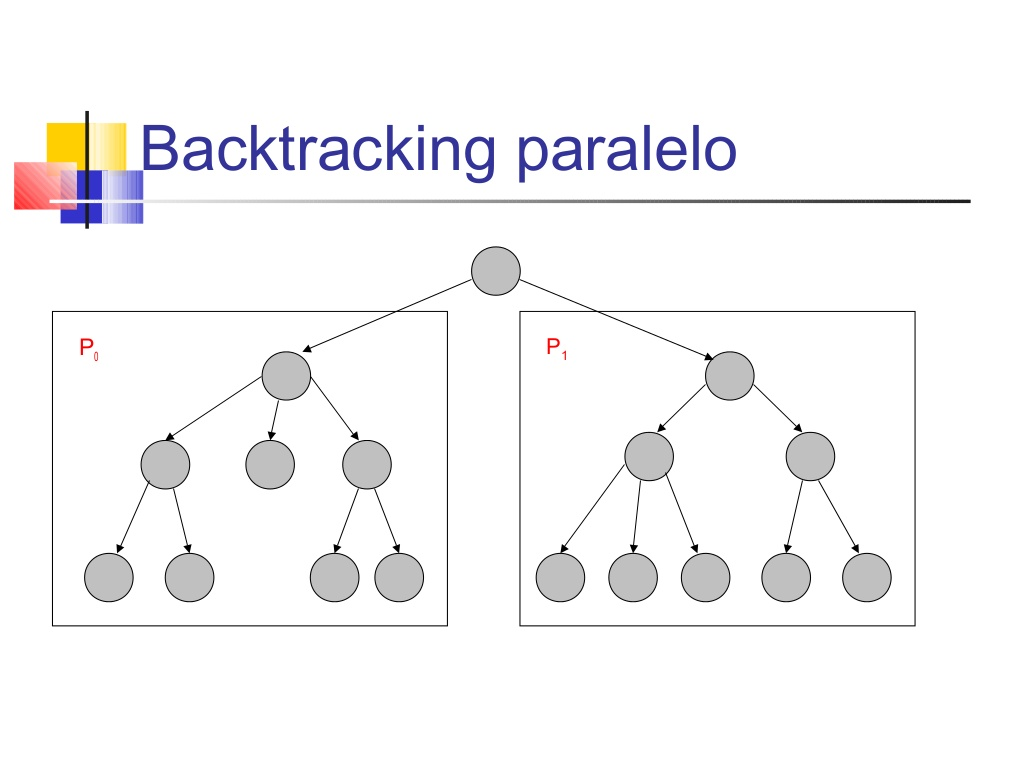


# **Sudoku 4x4**

Es un sudoku basico en el cual veremos una grafica con un arreglo mutidimensional de 4, en general una matriz 4x4 la busqueda de soluciones en  profundidad y como se genera a partir de uno nuevas matrices de soluciones posibles.

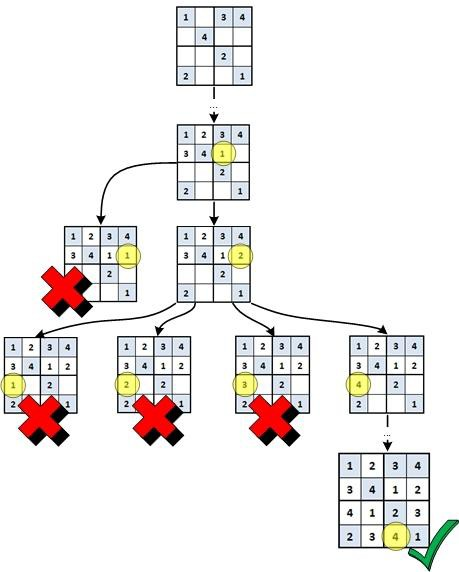


A continuacion observaremos un sudoku incompleto y la representacion correspondiente en la matriz

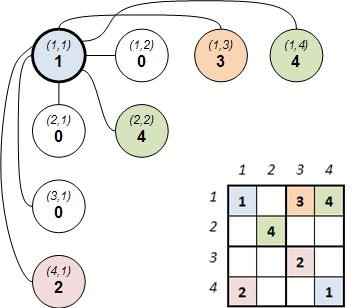

Ahora conociendo todos esos conceptos de Backtracking paralelo procederemos adentranos en el codigo y su implementacion.

# **Librerias necesarias**
Intalamos las librerias necesarias para ejecutarlo en c

In [ ]:
!apt list --installed

Aqui tendremos el codigo de nuestro programa, estamos utilizando las librerias de openMP para paralelizar y poder utilizar distintos hilos. Las Librerias stdbool para trabajar con modulos que devuelven valores booleanos

In [ ]:
sudoku="" #Limpia si hubiese algun string en la variable sudoku
sudoku="""
#include <stdio.h>
#include<omp.h>
#include <time.h>
#include <stdlib.h>
#include <math.h>
#include<stdbool.h>// Booleanos
#define N 9
"""

# **Modulo mostrar sudoku**
En esta parte de nuestro codigo se declara nuestro matriz nxn y tambien esta el modulo mostrar

In [ ]:
sudoku+="""
//  Inicializamos la matriz
int MatrizSudok [N][N];
//  Modulo mostrar
void MostrarSudoku() {
  printf("\\n");
  //  Recorremos nuestra matriz
  for (int Fila = 0; Fila < N; Fila++) {
    for (int Columna = 0; Columna < N; Columna++) {
      printf("%d\t ",MatrizSudok[Fila][Columna]);
      }
    printf("\\n \\n \\n");
  }
}
  """

# **Modulo es Seguro:**
1. Verificamos que en la fila no se repita valores.
2. Verificamos que no se repitan valores en la columna.
3. Verificamos en los bloques de dimension n^(1/2) x n^(1/2) que los valores de 1 hasta n no se repitan.



In [ ]:
sudoku+="""
bool EsSeguro(int Fila, int Columna, int Num){
    //---Verifica en la Fila que no se repita el avlor dado Num
    for (int d = 0; d < N; d++)
    {
        if (MatrizSudok[Fila] [d] == Num)
        {
            return false;
        }
    }
    //---Verifica en la Columna que no se repita el avlor dado Num
    for (int r = 0; r < N; r++)
    {
        if (MatrizSudok[r] [Columna] == Num)
        {
            return false;
        }
    }
    //---Saca la raiz cuadrada de N
    int raizCu = sqrt(N);
    int CuadroDeFila = Fila - Fila % raizCu;
    int CuadroDeColumna = Columna - Columna % raizCu;
    // --- Verificamos en la bloques de sqrt(N)xsqrt(N) que no se repita ningun valor
    for (int r = CuadroDeFila; r < CuadroDeFila + raizCu; r++)
    {
        for (int d = CuadroDeColumna; d < CuadroDeColumna + raizCu; d++)
        {
            if (MatrizSudok[r] [d] == Num)
            {
                return false;
            }
        }
    }
    return true;
}"""

# **Resolver sudoku:**
Aqui resolvemos nuestro sudoku aplicando bactraking
Aplicamos paralelismo con openMP y asi cada hilo toma diferentes valores y los
ejecuta y el resultado varia en vez de hacerlo solo con hilo

In [ ]:
sudoku+="""
bool ResolverSudoku()
{
    int Fila = -1;  // Icializamos en -1 fila y columna ya que la posicion 0,0 es un valor valido
    int Columna = -1;
    bool EstaVacio = true;  // Verificamos que la posicion esta vacio o represente el valor 0
    #pragma omp for
    for (int i = 0; i < N; i++) // Procedemos a buscar la posicion vacia
    {
        for (int j = 0; j < N; j++)
        {
            if (MatrizSudok[i][j] == 0)  // Encontramos la posicion vacia 
            {
                Fila = i;
                Columna = j;
                EstaVacio = false;  // Cambia el valor a false porque luego utilizaremos para poder terminar el proceso
            }
        }
    }
    if (EstaVacio) // En caso de que nuestro sudoku no haya tenga solucion es este punto donde detendra el programa
    {
        return true;
    }
    for (int Num = 1; Num <= N; Num++)  //  Inicia probando las soluciones desde  hasta N
    {
        if (EsSeguro(Fila, Columna, Num)) // Verifica si dicho es valido
        {
            MatrizSudok[Fila][Columna] = Num;  // Coloca como solucion valida ese valor en nuestra matriz
            //  Aqui es donde se realiza la llamda Recursiva vuelta atras si resulta 
            // True entonces nuestro valor era correcta y solcion 100% optima caso contrario da un salta haca atras
            if (ResolverSudoku())   
            {
                return true;
            }
            else  // La solucion anterior no es valida debemos probar en esa posicion con otro valor
            {
                MatrizSudok[Fila][Columna] = 0;  // Matenemos nuestra posicion como la original al no encontrar la solucion
            }
        }
    }
    return false;
}"""

# **Main Conductor del programa:**
Aqui es el main principal para poder ejecutar y concluir nuestra ejecución

In [ ]:
sudoku+="""int main() { 
    time_t comienzo, final; // Inicializamos los atributos para medir el tieempo
  int i,j;
  //   Inicializamos la matriz todos en valores 0
  for (i = 0; i < N; i++) {
    for (j = 0; j < N; j++) {
      MatrizSudok[i][j] = 0;
      }
  }
  // Verificamos que tenga solucion para poderlo mostrar
  //  En algunos casos el sudoku dado no podria solucion motivos , se repeti un elemento en algun lugar
  // Podria haber valores no aceptados
  comienzo = time( NULL ); // Captamos el tiempo de inicio 
  if(ResolverSudoku()){   
     MostrarSudoku();
     final = time( NULL ); // Capturamos el tiempo final sin anadir ningun valor modificable
      printf( "Número de segundos transcurridos desde el comienzo del programa: %fs \\n", difftime(final, comienzo) );}
  else{
    final = time( NULL );// Captamos el tiempo de inicio 
    printf("No se encontro la solucuion");
    final = time( NULL );// Capturamos el tiempo final sin anadir ningun valor modificable
    printf( "Número de segundos transcurridos desde el comienzo del programa: %fs \\n", difftime(final, comienzo) );
  }
  
}"""

Compilamos nuestro programa como sudoku.c, para luego poder ejecutarlo

In [ ]:
text_file = open("sudoku.c", "w")
text_file.write(sudoku)
text_file.close()

En esta indicamos la cantidad de hilos que vamos utilizar, podrias asumir el tamaño N con la cantidad de hilos

In [ ]:
%env OMP_NUM_THREADS=9

env: OMP_NUM_THREADS=9


In [ ]:
!gcc -o sudokuMatriz -fopenmp sudoku.c

In [ ]:
!./sudokuMatriz


2	 4	 6	 1	 3	 5	 8	 7	 9	 
 
 
1	 3	 5	 8	 7	 9	 2	 4	 6	 
 
 
8	 7	 9	 2	 4	 6	 1	 3	 5	 
 
 
5	 6	 3	 4	 1	 2	 7	 9	 8	 
 
 
4	 1	 2	 7	 9	 8	 5	 6	 3	 
 
 
7	 9	 8	 5	 6	 3	 4	 1	 2	 
 
 
6	 5	 4	 3	 2	 1	 9	 8	 7	 
 
 
3	 2	 1	 9	 8	 7	 6	 5	 4	 
 
 
9	 8	 7	 6	 5	 4	 3	 2	 1	 
 
 
Número de segundos transcurridos desde el comienzo del programa: 0.000000s 


# **Aspectos adicionales:**

La siguiente figura nos muestra un soduku solicionado por nuestro algoritmo en C#, puesto que le aplicamos grafica o windows form.


Es la solucion del problema que nos hemos planteado. Se que el sudoku es unos de los juegos mas populares que vienen en los periodicos y nuestro algoritmo nos permite encontrar la solucion al mismo instante

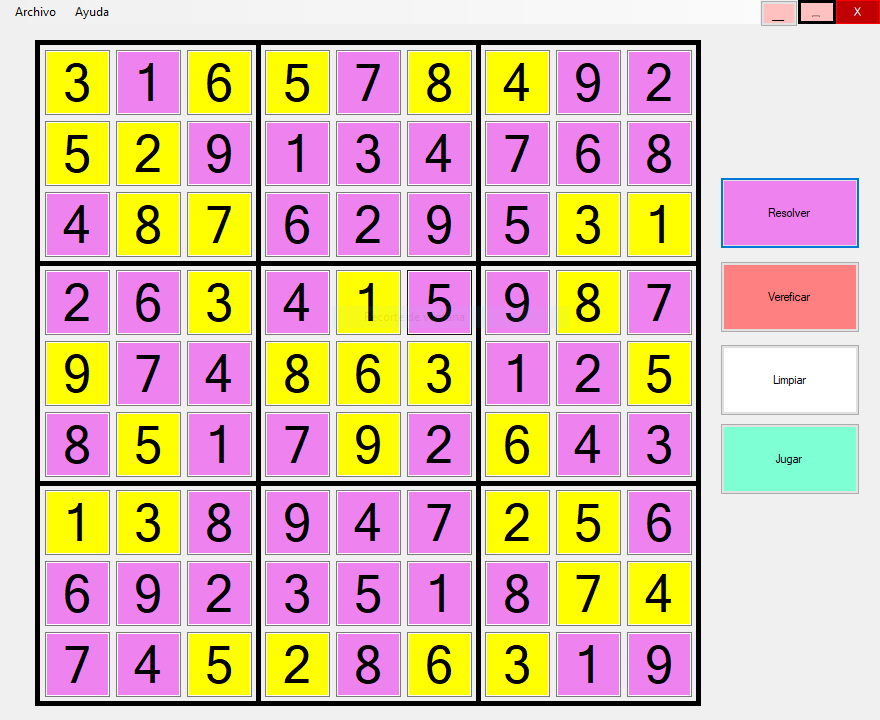

# **Conclusiones**
Para valores pequeños no es conveniente paralelizar en caso de que los tamaños sean mayores podremos notar la diferencia. Vemos que el palelismo del backtraking usando openMP.